# 2）相关系数法

In [12]:
import pandas as pd

advertising = pd.read_csv("data/advertising.csv")
advertising.drop(advertising.columns[0], axis=1, inplace=True)
advertising.dropna(inplace=True)
X = advertising.drop("Sales", axis=1)
y = advertising["Sales"]
# 计算皮尔逊相关系数
print(X.corrwith(y, method="pearson"))


TV           0.782224
Radio        0.576223
Newspaper    0.228299
dtype: float64


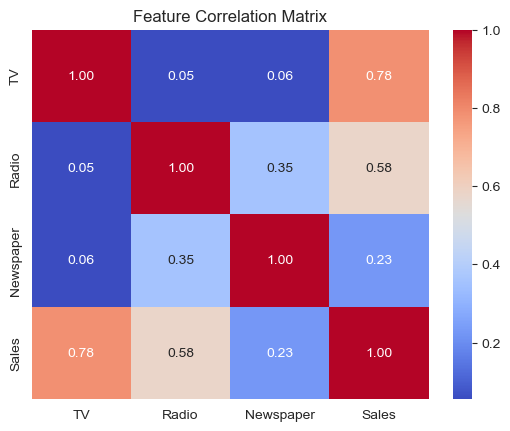

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算皮尔逊相关系数矩阵
corr_matrix = advertising.corr(method="pearson")
# 可视化热力图
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


# 3）斯皮尔曼相关系数

In [29]:
import pandas as pd

# 每周学习时长
X = [[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]]
# 数学考试成绩
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]
# 计算斯皮尔曼相关系数
X = pd.DataFrame(X)
y = pd.Series(y)
print(X.corrwith(y, method="spearman"))


0    0.987879
dtype: float64


# 4）主成分分析（PCA）

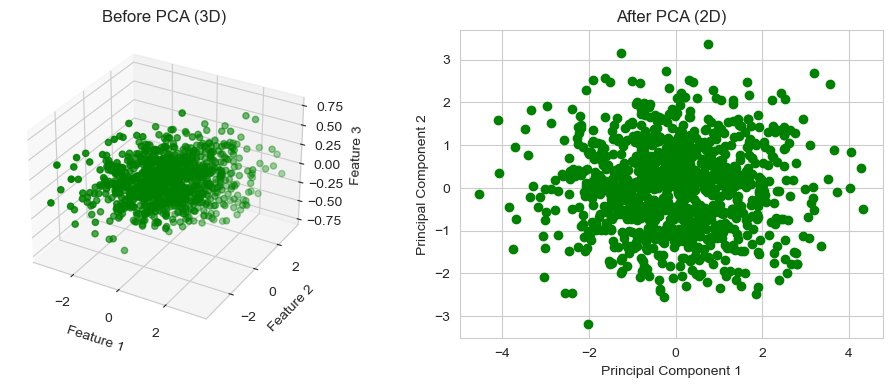

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_samples = 1000
# 第1个主成分方向
component1 = np.random.normal(0, 1, n_samples)
# 第2个主成分方向
component2 = np.random.normal(0, 0.2, n_samples)
# 第3个方向（噪声，方差较小）
noise = np.random.normal(0, 0.1, n_samples)
# 构造3维数据
X = np.vstack([component1 - component2, component1 + component2, component2 + noise]).T

# 标准化
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 应用PCA，将3维数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
#X_pca是ndarray
# 可视化
# 转换前的3维数据可视化
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c="g")
ax1.set_title("Before PCA (3D)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")
# 转换后的2维数据可视化
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c="g")
ax2.set_title("After PCA (2D)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.show()


# KNN

In [32]:
# 分类
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # KNN分类模型，K值为2
X = [[2, 1], [3, 1], [1, 4], [2, 6]]  # 特征
y = [0, 0, 1, 1]  # 标签
knn.fit(X, y)  # 模型训练
knn.predict([[4, 9]])  # 预测


array([1])

In [34]:
# 回归
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)  # KNN回归模型，K值为2
X = [[2, 1], [3, 1], [1, 4], [2, 6]]  # 特征
y = [0.5, 0.33, 4, 3]  # 标签
knn.fit(X, y)  # 模型训练
knn.predict([[4, 9]])  # 预测


array([3.5])

# 线性回归

In [36]:
from sklearn.linear_model import LinearRegression

# 自变量，每周学习时长
X = [[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]]
# 因变量，数学考试成绩
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]
# 实例化线性回归模型
model = LinearRegression()
# 模型训练
model.fit(X, y)
# 系数，每周每学习1小时，成绩会增加多少分
print(model.coef_)
# 截距
print(model.intercept_)
# 预测,每周学习11小时，成绩可能是多少分
print(model.predict([[11]]))


[2.87070855]
41.45069393718042
[73.02848795]


# 逻辑回归

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 加载数据集
heart_disease = pd.read_csv("data/heart_disease.csv")
heart_disease.dropna()

# 划分为训练集与测试集
X = heart_disease.drop("是否患有心脏病", axis=1)  # 特征
y = heart_disease["是否患有心脏病"]  # 标签
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 特征工程
# 数值型特征
numerical_features = ["年龄", "静息血压", "胆固醇", "最大心率", "运动后的ST下降", "主血管数量"]
# 类别型特征
categorical_features = ["胸痛类型", "静息心电图结果", "峰值ST段的斜率", "地中海贫血"]
# 二元特征
binary_features = ["性别", "空腹血糖", "运动性心绞痛"]
# 创建列转换器
preprocessor = ColumnTransformer(
    transformers=[
        # 对数值型特征进行标准化
        ("num", StandardScaler(), numerical_features),
        # 对类别型特征进行独热编码，使用drop="first"避免多重共线性
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        # 二元特征不进行处理
        ("binary", "passthrough", binary_features),
    ]
)
# 执行特征转换
x_train = preprocessor.fit_transform(x_train)  # 计算训练集的统计信息并进行转换
x_test = preprocessor.transform(x_test)  # 使用训练集计算的信息对测试集进行转换

# 模型训练
model = LogisticRegression()
model.fit(x_train, y_train)

# 模型评估，计算准确率
model.score(x_test, y_test)


0.8441558441558441

# k-means 聚类

D:\conda\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


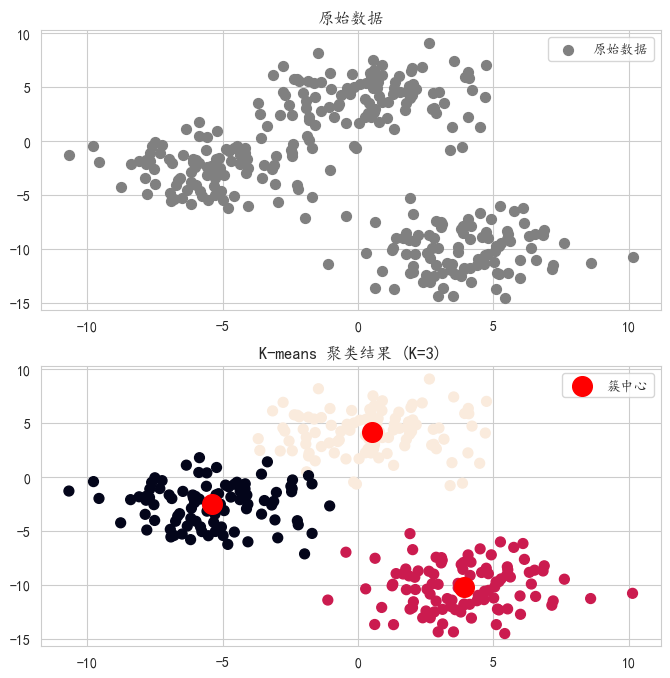

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False

# 使用 make_blobs 生成 3 个簇，每个簇 100 个点
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=2)

fig, ax = plt.subplots(2, figsize=(8, 8))
ax[0].scatter(X[:, 0], X[:, 1], s=50, c="gray", label="原始数据")
ax[0].set_title("原始数据")
ax[0].legend()

# 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  # 预测每个点的簇标签
centers = kmeans.cluster_centers_  # 获取簇中心

ax[1].scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans)
ax[1].scatter(centers[:, 0], centers[:, 1], s=200, c="red", marker="o", label="簇中心")
ax[1].set_title("K-means 聚类结果 (K=3)")
ax[1].legend()
plt.show()


D:\conda\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


簇内平方和： 11082.329099773358
轮廓系数： 0.33072220580764206
CH指数： 243.73743219464754


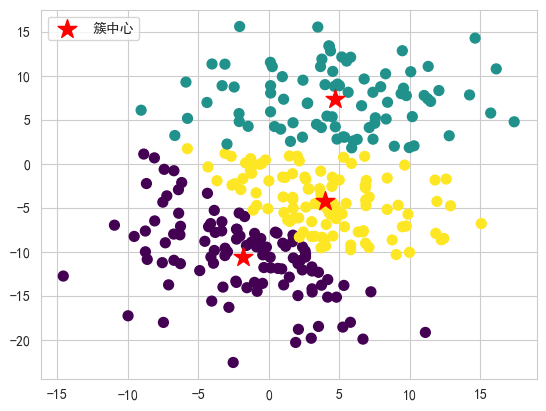

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 使用 make_blobs 生成 3 个簇，每个簇 100 个点
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=5)
# 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  # 预测每个点的簇标签
centers = kmeans.cluster_centers_  # 获取簇中心
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="red", marker="*", label="簇中心")
plt.legend()
print("簇内平方和：", kmeans.inertia_)
print("轮廓系数：", silhouette_score(X, y_kmeans))
print("CH指数：", calinski_harabasz_score(X, y_kmeans))
plt.show()
